In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df_meps = pd.read_csv('./data/silver/mep_membership_timeline.csv')

df_questions = pd.read_csv("./data/silver/questions_topics.csv", index_col=0)


questions_raw = pd.read_csv("./data/questions_details_2.csv")
questions_raw["id"] = questions_raw["id"].apply(lambda x: x.split("/")[-1])
questions_raw["creator"] = questions_raw["creator"].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)
questions_raw = questions_raw.explode("creator")
questions_raw = questions_raw.drop_duplicates()

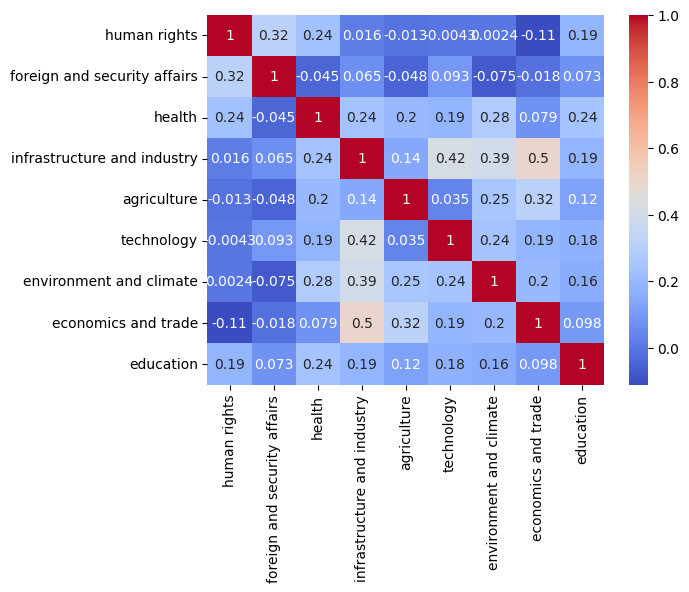

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_questions.iloc[:, 1:].corr(), annot=True, cmap="coolwarm")
plt.show()

- Baixa correlação entre temas: bom
- Alguma correlação entre economia e infraestritira, ok

In [3]:
df = df_questions.reset_index().merge(questions_raw, on="id", how="left")

# Avaliar concentração temática por parlamentar

In [4]:
df_g = (
    df[
        [
            "creator",
            "human rights",
            "foreign and security affairs",
            "health",
            "infrastructure and industry",
            "agriculture",
            "technology",
            "environment and climate",
            "economics and trade",
            "education",
        ]
    ]
    .groupby("creator")
    .mean()
    .reset_index()
)

df_g = df_g[[True if "person" in c else False for c in df_g["creator"]]].reset_index(
    drop=True
)

df_g.sort_values(by="human rights", ascending=False)

,creator,human rights,foreign and security affairs,health,infrastructure and industry,agriculture,technology,environment and climate,economics and trade,education
1242,person/257075,0.990601,0.721568,0.288880,0.408824,0.095640,0.107230,0.196160,0.155237,0.045030
1030,person/249284,0.983432,0.898430,0.154454,0.101372,0.060945,0.110258,0.068609,0.054980,0.090461
1068,person/256855,0.970767,0.100540,0.358811,0.297315,0.219624,0.067420,0.158599,0.108900,0.334216
1227,person/257058,0.956269,0.253563,0.371341,0.549977,0.202575,0.517242,0.801048,0.404580,0.146094
1235,person/257067,0.956269,0.253563,0.371341,0.549977,0.202575,0.517242,0.801048,0.404580,0.146094
...,...,...,...,...,...,...,...,...,...,...
1056,person/256831,0.049767,0.172526,0.067259,0.330147,0.067909,0.174572,0.955461,0.459966,0.039899
1213,person/257041,0.040220,0.839815,0.003824,0.838434,0.009121,0.026952,0.003077,0.313127,0.001251
1163,person/256980,0.040152,0.038961,0.101529,0.283636,0.065959,0.282792,0.665738,0.348304,0.062120
1160,person/256977,0.030987,0.002755,0.006052,0.182479,0.001278,0.344543,0.966947,0.032174,0.003158


- Há concentração temática em certos temas por parlamentar

# Comparar o cluster de cada parlamentar com a concentração temática

In [5]:
df_graph = pd.read_csv("./data/gold/gephi_graph_data.csv")

df_graph.head()

,Id,Label,timeset,type,modularity_class,indegree,outdegree,degree,weighted indegree,weighted outdegree,weighted degree,Authority,Hub,componentnumber,strongcompnum,stat_inf_class,clustering,eigencentrality
0,064616126640-05,Air France-KLM,NaN,Companies & groups,11,0,23,23,0,45,45,0.000000,0.034947,0,23,0,0,0.000000
1,197502,Marie-Pierre VEDRENNE,NaN,Mep,11,60,0,60,90,0,90,0.060138,0.000000,0,22,0,0,0.317460
2,197581,NaN,NaN,NaN,0,99,0,99,229,0,229,0.094578,0.000000,0,21,0,0,0.523810
3,197529,Leila CHAIBI,NaN,Mep,3,47,0,47,63,0,63,0.034219,0.000000,0,20,0,0,0.248677
4,197589,Laurence FARRENG,NaN,Mep,11,47,0,47,133,0,133,0.039436,0.000000,0,19,0,0,0.248677


In [6]:
# tratar ids
# como só quero comprar com mep, na hora do merge não preciso condiderar o type
df_graph["id"] = df_graph["Id"].apply(lambda x: f"person/{x}")

In [7]:
df_m = df_g.merge(df_graph, left_on="creator", right_on="id", how="left")

df_m = df_m.dropna(subset=["modularity_class"])

<Axes: >

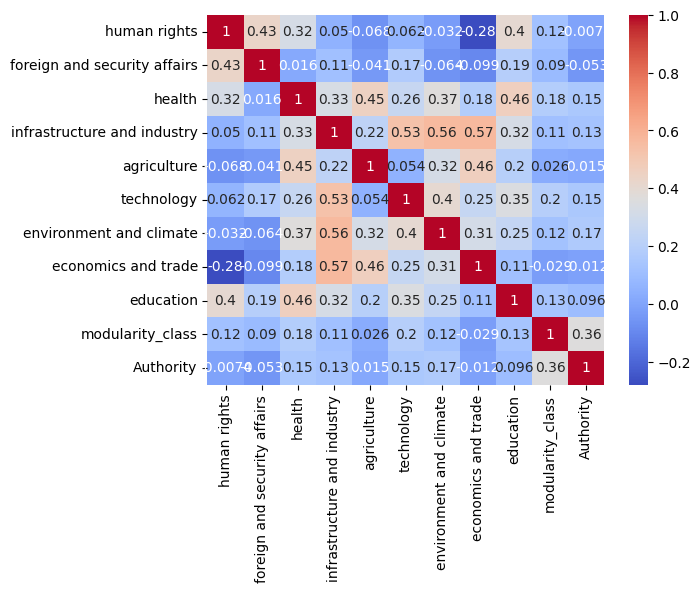

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    df_m[
        [
            "human rights",
            "foreign and security affairs",
            "health",
            "infrastructure and industry",
            "agriculture",
            "technology",
            "environment and climate",
            "economics and trade",
            "education",
            "modularity_class",
            "Authority",
        ]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)

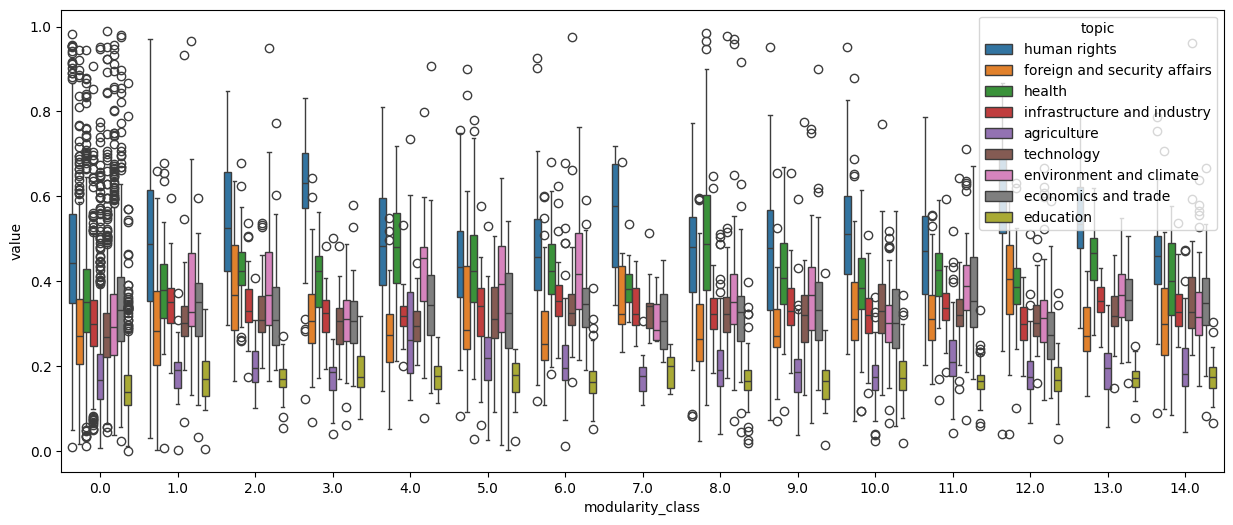

In [8]:
import seaborn as sns

X_columns = [
    "human rights",
    "foreign and security affairs",
    "health",
    "infrastructure and industry",
    "agriculture",
    "technology",
    "environment and climate",
    "economics and trade",
    "education",
]


dd = pd.melt(df_m, id_vars=["modularity_class"], value_vars=X_columns, var_name="topic")

# Set figure size to make plot wider
plt.figure(figsize=(15, 6))
sns.boxplot(x="modularity_class", y="value", data=dd, hue="topic")

plt.show()

- padrão não muito claro... vou testar utilizando regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


X_columns = [
    "human rights",
    "foreign and security affairs",
    "health",
    "infrastructure and industry",
    "agriculture",
    "technology",
    "environment and climate",
    "economics and trade",
    "education",
]


X = df_m[X_columns].fillna(0)


for mcls in df_m["modularity_class"].dropna().sort_values().unique():

    Y = [1 if c == mcls else 0 for c in df_m["modularity_class"]]

    # logit regression

    model = LogisticRegression()
    X = sm.add_constant(X)

    model.fit(X, Y)

    print("-" * 100)

    print("Modularity class: ", mcls)
    logit_model = sm.Logit(Y, X)
    result = logit_model.fit(disp=0)
    print(result.summary())

----------------------------------------------------------------------------------------------------
Modularity class:  0.0
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1510
Model:                          Logit   Df Residuals:                     1500
Method:                           MLE   Df Model:                            9
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.08034
Time:                        22:02:27   Log-Likelihood:                -953.95
converged:                       True   LL-Null:                       -1037.3
Covariance Type:            nonrobust   LLR p-value:                 3.033e-31
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            2.7073      0.329

- Batendo com a base dos top_ten_by_hub parecem fazer sentido esses coeficientes...

# Criar o dado em painel com informações dos parlametnares e temas

In [10]:
from datetime import datetime

## Questões

In [11]:
columns_to_keep = [
    "creator",
    "document_date",
    "human rights",
    "foreign and security affairs",
    "health",
    "infrastructure and industry",
    "agriculture",
    "technology",
    "environment and climate",
    "economics and trade",
    "education",
]
df_questions = df[columns_to_keep]

## Reuniões

In [12]:
df_meetings = pd.read_csv("./data/silver/df_meetings_lobbyists.csv")

In [13]:
df_meetings[df_meetings["member_id"] == "person/197502"].sort_values("meeting_date")

,member_id,meeting_date,member_capacity,lobbyist_id,l_category,l_head_office_country,l_agriculture,l_economics_and_trade,l_education,l_environment_and_climate,l_foreign_and_security_affairs,l_health,l_human_rights,l_infrastructure_and_industry,technology,l_ln_max_budget,l_days_since_registration
2002,person/197502,2019-07-17,Member,9624415524-28,Business,BELGIUM,0,1,0,1,1,0,0,1,1,13.304685,3925
297,person/197502,2019-07-24,Member,790573922716-64,Business,BELGIUM,0,1,0,1,1,1,0,1,0,12.206073,1101
0,person/197502,2019-07-25,Member,064616126640-05,Business,FRANCE,0,1,0,1,1,1,0,1,0,13.710150,841
6459,person/197502,2019-09-17,Member,43284012043-03,Business,FRANCE,0,1,0,1,1,0,0,1,1,12.899220,3708
8418,person/197502,2019-09-18,Member,393423121496-65,Business,UNITED STATES,0,1,1,1,1,1,0,1,1,13.592367,1244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14223,person/197502,2023-10-04,Member,5265780509-97,Business,BELGIUM,1,1,1,1,1,1,1,1,1,14.038654,5468
22678,person/197502,2023-10-23,Member,592343015058-67,Business,CHINA,0,1,0,0,1,0,0,1,0,12.206073,3248
38615,person/197502,2023-11-08,Member,123029215230-76,Other,FRANCE,1,1,0,1,0,1,0,1,0,12.206073,3254
39686,person/197502,2023-11-08,Member,6113045396-06,Other,FRANCE,0,1,1,1,1,1,1,1,1,13.122363,5532


# !!! Validar !!! 
verificar se há reuniões mesmo com esses caras nesses dias, principalmente os mais outliers

## Dados do Parlamentar

In [14]:
df_meps = pd.read_csv("./data/silver/mep_membership_timeline.csv")

In [15]:
def find_mep_status_on_date(mep_id, date, df_meps):
    resp = df_meps[(df_meps["ID"] == mep_id) & (df_meps["date"] <= date)].sort_values(
        "date", ascending=False
    )
    try:
        return resp.iloc[0].to_dict()
    except IndexError as e:
        # print(mep_id, date)
        return None


find_mep_status_on_date(197502, "2009-01-01", df_meps)

{'ID': 197502,
 'date': '2008-06-11',
 'COUNTRY': nan,
 ' - MEMBER_PARLIAMENT': nan,
 'POLITICAL_GROUP': nan,
 'EU_POLITICAL_GROUP - MEMBER': nan,
 'NATIONAL_CHAMBER - MEMBER': nan,
 'EU_INSTITUTION - MEMBER': nan,
 'DELEGATION_PARLIAMENTARY_ASSEMBLY - MEMBER_SUBSTITUTE': nan,
 'COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE': nan,
 'DELEGATION_JOINT_COMMITTEE - MEMBER': nan,
 'COMMITTEE_PARLIAMENTARY_STANDING - MEMBER': nan,
 'WORKING_GROUP - MEMBER': nan,
 'DELEGATION_PARLIAMENTARY - MEMBER': nan,
 ' - MEMBER': nan,
 'DELEGATION_PARLIAMENTARY - CHAIR': nan,
 'DELEGATION_PARLIAMENTARY - MEMBER_SUBSTITUTE': nan,
 'DELEGATION_PARLIAMENTARY - CHAIR_VICE': nan,
 'COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE': nan,
 'DELEGATION_JOINT_COMMITTEE - MEMBER_SUBSTITUTE': nan,
 'EU_POLITICAL_GROUP - CHAIR_VICE': nan,
 'COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER_SUBSTITUTE': nan,
 'COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER': nan,
 'COMMITTEE_PARLIAMENTARY_TEMPORARY - MEMBER_SUBSTITUTE': nan,
 

# Combine dataframes



## df dados das questions

In [16]:
all_dates = set(df_meetings["meeting_date"].unique()) | set(
    df_questions["document_date"].unique()
)
all_meps = set(df_meetings["member_id"].unique()) | set(
    df_questions["creator"].unique()
)

all_meps = [m for m in all_meps if "person" in str(m)]

In [17]:
df_panel = (
    pd.DataFrame(
        index=pd.MultiIndex.from_product(
            [
                all_meps,
                all_dates,
            ],
        )
    )
    .reset_index(names=["member_id", "date"])
    .sort_values(by=["member_id", "date"])
    .dropna()
)

In [18]:
# add questions to df_panel
df_panel_1 = df_panel.merge(
    df_questions,
    left_on=["member_id", "date"],
    right_on=["creator", "document_date"],
    how="left",
)

print(f"Total with data: {len(df_panel_1[~df_panel_1['creator'].isna()])}")
print(f"Total df1: {len(df_panel_1)} of {len(df_panel)}")

del df_panel_1["creator"]
del df_panel_1["document_date"]

df_panel_1.fillna(0, inplace=True)

# Rename all columns, except (member_id, date) to include a "question_" prefix
for col in df_panel_1.columns:
    if col not in ["member_id", "date"]:
        df_panel_1.rename(columns={col: f"question_{col}"}, inplace=True)

df_panel_1.head()

Total with data: 123934
Total df1: 5256139 of 5219850


,member_id,date,question_human rights,question_foreign and security affairs,question_health,question_infrastructure and industry,question_agriculture,question_technology,question_environment and climate,question_economics and trade,question_education
0,person/101039,2008-06-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,person/101039,2009-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,person/101039,2009-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,person/101039,2009-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,person/101039,2009-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Há mais dados pois tem parlamentares com mais de uma question por dia....

In [21]:
df_panel_1.groupby(["member_id", "date"]).size().sort_values(ascending=False)

member_id      date      
person/96775   2015-03-31    92
person/125031  2015-07-09    66
person/125002  2015-05-20    58
person/96936   2015-02-24    55
person/124869  2015-05-07    47
                             ..
person/197453  2023-06-28     1
               2023-06-27     1
               2023-06-26     1
               2023-06-24     1
person/99945   2025-02-28     1
Length: 5219850, dtype: int64

In [19]:
df_panel_1.to_csv("./data/silver/panel_data_1_questions.csv", index=False)

## df das reuniões

In [20]:
df_panel_2 = df_panel.merge(
    df_meetings,
    left_on=["member_id", "date"],
    right_on=["member_id", "meeting_date"],
    how="left",
)

df_panel_2.dropna(inplace=True)
print(f"Total with data: {len(df_panel_2[~df_panel_2['meeting_date'].isna()])}")
print(f"Total df2: {len(df_panel_2)} of {len(df_panel)}")

del df_panel_2["meeting_date"]
del df_panel_2["lobbyist_id"]

df_panel_2.fillna(0, inplace=True)

# Rename all columns, except (member_id, date) to include a "meeting_" prefix
for col in df_panel_2.columns:
    if col not in ["member_id", "date"]:
        df_panel_2.rename(columns={col: f"meeting_{col}"}, inplace=True)

df_panel_2.head()

Total with data: 40343
Total df2: 40343 of 5219850


,member_id,date,meeting_member_capacity,meeting_l_category,meeting_l_head_office_country,meeting_l_agriculture,meeting_l_economics_and_trade,meeting_l_education,meeting_l_environment_and_climate,meeting_l_foreign_and_security_affairs,meeting_l_health,meeting_l_human_rights,meeting_l_infrastructure_and_industry,meeting_technology,meeting_l_ln_max_budget,meeting_l_days_since_registration
2104,person/101039,2022-03-08,Shadow rapporteur,Business,ITALY,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.512925,5.0
2111,person/101039,2022-03-16,Shadow rapporteur,Business,BELGIUM,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,14.038654,4905.0
2154,person/101039,2022-05-03,Shadow rapporteur,Business,ITALY,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,13.592367,3808.0
2210,person/101039,2022-07-05,Shadow rapporteur,Business,ITALY,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,13.592367,3871.0
2502,person/101039,2023-06-13,Shadow rapporteur,Business,ITALY,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,13.592367,4214.0


In [21]:
df_panel_2.to_csv("./data/silver/panel_data_2_meetings.csv", index=False)

Validar esse resultado....

In [24]:
df_panel_2.groupby(["member_id", "date"]).size().sort_values(ascending=False)

member_id      date      
person/96761   2023-03-08    143
person/1927    2022-02-07     86
               2022-12-20     84
               2022-10-14     80
person/197449  2024-05-02     64
                            ... 
person/197515  2023-12-15      1
               2023-12-13      1
               2023-12-12      1
               2023-12-09      1
person/197638  2019-11-05      1
Length: 25680, dtype: int64

### Merge both

In [22]:
df_panel_3 = df_panel_1.merge(
    df_panel_2,
    left_on=["member_id", "date"],
    right_on=["member_id", "date"],
    how="left",
)
print(f"Total: {len(df_panel_3)}")

Total: 5270914


## Tratar dados dos parlamentares

## Calcular com base nas datas existents
Precisamos pegar o status do parlamentar em cada data

In [27]:
df_to_get_data_from_mep = (
    df_meetings[["member_id", "meeting_date"]]
    .drop_duplicates()
    .rename({"meeting_date": "date"}, axis=1)
    .set_index(["member_id", "date"])
    .join(
        df_questions[["creator", "document_date"]]
        .drop_duplicates()
        .rename({"document_date": "date", "creator": "member_id"}, axis=1)
        .set_index(["member_id", "date"]),
    )
    .reset_index()
)

In [ ]:
from tqdm import tqdm
from joblib import Parallel, delayed


df_panel_4 = df_to_get_data_from_mep.copy()


def process_row(i):
    mep_status = find_mep_status_on_date(
        int(df_panel_4.loc[i, "member_id"].split("/")[-1]),
        df_panel_4.loc[i, "date"],
        df_meps,
    )
    if mep_status is None:
        return (i, None)
    else:
        return (
            i,
            {f"mep_{k}": v for k, v in mep_status.items() if k not in ("ID", "date")},
        )


results = Parallel(n_jobs=20)(delayed(process_row)(i) for i in tqdm(df_panel_4.index))

for i, mep_dict in results:
    if mep_dict is not None:
        for col, val in mep_dict.items():
            df_panel_4.loc[i, col] = val

100%|██████████| 25680/25680 [8:30:49<00:00,  1.19s/it]  


In [ ]:
df_panel_4.to_csv("./data/silver/panel_data_4_mep.csv", index=False)

## Carregar dado já calculado

In [ ]:
df_panel_4 = pd.read_csv("./data/silver/panel_data_4_mee.csv")

In [ ]:
df_panel_4_clean = df_panel_4[~df_panel_4["mep_ - MEMBER_PARLIAMENT"].isna()].fillna(0)

In [25]:
df_panel_4_clean.describe().T.head(40).sort_index()

,count,mean,std,min,25%,50%,75%,max
mep_ - MEMBER,19400.0,0.158402,0.365127,0.0,0.0,0.0,0.0,1.0
mep_ - MEMBER_PARLIAMENT,19400.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - CHAIR_VICE,19400.0,0.001856,0.043039,0.0,0.0,0.0,0.0,1.0
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER,19400.0,0.019124,0.136963,0.0,0.0,0.0,0.0,1.0
mep_COMMITTEE_PARLIAMENTARY_SPECIAL - MEMBER_SUBSTITUTE,19400.0,0.029175,0.168302,0.0,0.0,0.0,0.0,1.0
mep_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR,19400.0,0.059845,0.237206,0.0,0.0,0.0,0.0,1.0
mep_COMMITTEE_PARLIAMENTARY_STANDING - CHAIR_VICE,19400.0,0.134897,0.341622,0.0,0.0,0.0,0.0,1.0
mep_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER,19400.0,0.874485,0.331311,0.0,1.0,1.0,1.0,1.0
mep_COMMITTEE_PARLIAMENTARY_STANDING - MEMBER_SUBSTITUTE,19400.0,0.905876,0.292008,0.0,1.0,1.0,1.0,1.0
mep_COMMITTEE_PARLIAMENTARY_SUB - CHAIR_VICE,19400.0,0.013454,0.115210,0.0,0.0,0.0,0.0,1.0


### Remover variáveis desnecessárias

In [ ]:
cols_to_ignore = [
    "mep_ - MEMBER_PARLIAMENT",  # todos são
    "mep_EU_POLITICAL_GROUP - MEMBER",
    "mep_NATIONAL_CHAMBER - MEMBER",  # todos são
    "mep_ - MEMBER",
]

df_panel_4_clean = df_panel_4_clean.drop(columns=cols_to_ignore)

df_panel_4_clean_w_dummies = pd.get_dummies(
    df_panel_4_clean, columns=["mep_POLITICAL_GROUP", "mep_COUNTRY"], dtype=float
)

df_panel_4_clean_w_dummies.to_csv("df_panel_4_clean.csv", index=False)

# Adicionar ao painel final
Preferir rodar essa parte de baixo com um ambiente zerado pois consome bastante memória

In [1]:
import pandas as pd

In [2]:
df_panel_1 = pd.read_csv("./data/silver/panel_data_1_questions.csv")
df_panel_2 = pd.read_csv("./data/silver/panel_data_2_meetings.csv")
df_panel_4 = pd.read_csv("./data/silver/panel_data_4_mep.csv")

df_panel_3 = df_panel_1.merge(
    df_panel_2,
    left_on=["member_id", "date"],
    right_on=["member_id", "date"],
    how="left",
).fillna(0)
print(f"Total: {len(df_panel_3)}")

Total: 5270914


In [3]:
df = df_panel_3.fillna(0).merge(
    df_panel_4.fillna(0), on=["member_id", "date"], how="left"
)

In [4]:
df.fillna(0).to_csv("./data/gold/panel_data_w_topics_ymd.csv", index=False)

## Agregar por diferentes intervalos

In [6]:
pd.set_option('display.max_rows', 200)
df_descriptives = df.describe().T.sort_index()

C:\Users\caca_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [7]:
df_d = df_descriptives.reset_index()

variables_to_keep = df_d[df_d['max'] > 0]['index'].tolist()
variables_func_max = df_d[df_d['max'] == 1]['index'].tolist()

In [8]:
df.head()

,member_id,date,question_human rights,question_foreign and security affairs,question_health,question_infrastructure and industry,question_agriculture,question_technology,question_environment and climate,question_economics and trade,...,mep_COUNTRY_LUX,mep_COUNTRY_LVA,mep_COUNTRY_MLT,mep_COUNTRY_NLD,mep_COUNTRY_POL,mep_COUNTRY_PRT,mep_COUNTRY_ROU,mep_COUNTRY_SVK,mep_COUNTRY_SVN,mep_COUNTRY_SWE
0,person/101039,2008-06-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,person/101039,2009-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,person/101039,2009-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,person/101039,2009-02-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,person/101039,2009-02-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_panel_final = df[["member_id", "date", *variables_to_keep]]

# df_panel_final.to_csv("./data/silver/panel_data_final.csv", index=False)

In [15]:
df_panel_final['date_yyyy_mm'] = df_panel_final['date'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])

C:\Users\caca_\AppData\Local\Temp\ipykernel_11568\718382880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panel_final['date_yyyy_mm'] = df_panel_final['date'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])


In [16]:
df_yyyy_mm_max = df_panel_final.groupby(['date_yyyy_mm', 'member_id']).max()

In [18]:
df_yyyy_mm_max.head()

date  meeting_l_agriculture  \
date_yyyy_mm member_id                                          
2008-06      person/101039  2008-06-11                    0.0   
             person/101580  2008-06-11                    0.0   
             person/101585  2008-06-11                    0.0   
             person/1023    2008-06-11                    0.0   
             person/102886  2008-06-11                    0.0   

                            meeting_l_days_since_registration  \
date_yyyy_mm member_id                                          
2008-06      person/101039                                0.0   
             person/101580                                0.0   
             person/101585                                0.0   
             person/1023                                  0.0   
             person/102886                                0.0   

                            meeting_l_economics_and_trade  \
date_yyyy_mm member_id                                      
2008-06      person/101039                            0.0   
             person/101580                            0.0   
             person/101585                            0.0   
             person/1023                              0.0   
             person/102886                            0.0   

                            meeting_l_education  \
date_yyyy_mm member_id                            
2008-06      person/101039                  0.0   
             person/101580                  0.0   
             person/101585                  0.0   
             person/1023                    0.0   
             person/102886                  0.0   

                            meeting_l_environment_and_climate  \
date_yyyy_mm member_id                                          
2008-06      person/101039                                0.0   
             person/101580                                0.0   
             person/101585                                0.0   
             person/1023                                  0.0   
             person/102886                                0.0   

                            meeting_l_foreign_and_security_affairs  \
date_yyyy_mm member_id                                               
2008-06      person/101039                                     0.0   
             person/101580                                     0.0   
             person/101585                                     0.0   
             person/1023                                       0.0   
             person/102886                                     0.0   

                            meeting_l_health  meeting_l_human_rights  \
date_yyyy_mm member_id                                                 
2008-06      person/101039               0.0                     0.0   
             person/101580               0.0                     0.0   
             person/101585               0.0                     0.0   
             person/1023                 0.0                     0.0   
             person/102886               0.0                     0.0   

                            meeting_l_infrastructure_and_industry  ...  \
date_yyyy_mm member_id                                             ...   
2008-06      person/101039                                    0.0  ...   
             person/101580                                    0.0  ...   
             person/101585                                    0.0  ...   
             person/1023                                      0.0  ...   
             person/102886                                    0.0  ...   

                            mep_WORKING_GROUP - PRESIDENT_PARLIAMENT_STOA  \
date_yyyy_mm member_id                                                      
2008-06      person/101039                                            NaN   
             person/101580                                            NaN   
             person/101585                               

In [19]:
df_yyyy_mm_max.drop(columns=['date'], inplace=True)
df_yyyy_mm_max.reset_index(inplace=True)

In [20]:
df_yyyy_mm_max.head()

,date_yyyy_mm,member_id,meeting_l_agriculture,meeting_l_days_since_registration,meeting_l_economics_and_trade,meeting_l_education,meeting_l_environment_and_climate,meeting_l_foreign_and_security_affairs,meeting_l_health,meeting_l_human_rights,...,mep_WORKING_GROUP - PRESIDENT_PARLIAMENT_STOA,question_agriculture,question_economics and trade,question_education,question_environment and climate,question_foreign and security affairs,question_health,question_human rights,question_infrastructure and industry,question_technology
0,2008-06,person/101039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-06,person/101580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-06,person/101585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-06,person/1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-06,person/102886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_yyyy_mm_max.to_csv("./data/gold/panel_data_w_topics_yyyy_mm_max.csv", index=False)